# Data Mining

## Similarity Measures

### Euclidean Score

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Function to compute Euclidean Distance
def euclidean(v1, v2):
    
    # Convert 1-D python lists to numpy vectors
    v1 = np.array(v1)
    v2 = np.array(v2)
    
    # Compute vector which is the element wise square of the difference
    diff = np.power(np.array(v1) - np.array(v2), 2)
    
    # Perform summation of the elements of the above vector
    sigma_val = np.sum(diff)
    
    # Compute square root and return final Euclidean score
    euclid_score = np.sqrt(sigma_val)
    
    return euclid_score

In [3]:
# Define 3 users with ratings for 5 movies
u1 = [5, 1, 2, 4, 5]
u2 = [1, 5, 4, 2, 1]
u3 = [5, 2, 2, 4, 4]

In [4]:
euclidean(u1, u2)

7.483314773547883

In [5]:
euclidean(u1, u3)

1.4142135623730951

### Pearson Correlation

In [6]:
alice = [1, 1, 3, 2, 4]
bob = [2, 2, 4, 3, 5]

In [7]:
euclidean(alice, bob)

2.23606797749979

In [8]:
eve = [5, 5, 3, 4, 2]

In [9]:
euclidean(eve, alice)

6.324555320336759

In [10]:
from scipy.stats import pearsonr

In [11]:
pearsonr(alice, bob)

(1.0, 0.0)

In [12]:
pearsonr(alice, eve)

(-1.0, 0.0)

In [13]:
pearsonr(bob, eve)

(-1.0, 0.0)

### Clustering

#### K-Means

In [14]:
# Import the functions that enables us to plot clusters
from sklearn.datasets.samples_generator import make_blobs

In [15]:
# Get points such that they form 3 visually separable clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.50, random_state=0)

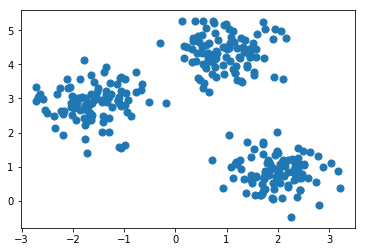

In [16]:
# Plot the points on a scatterplot
plt.scatter(X[:, 0], X[:, 1], s=50)

In [17]:
# Import the K-Means Class
from sklearn.cluster import KMeans

In [18]:
# Initializer the K-Means object. Set number of clusters to 3, 
# Centroid initializer as 'random' and maximum iterations to 10
kmeans = KMeans(n_clusters=3, init='random', max_iter=10)

In [19]:
# Compute the K-Means clustering
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=10,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
# Compute the classes for every point
y_pred = kmeans.predict(X)

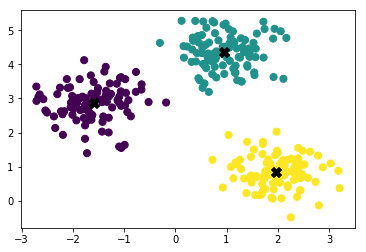

In [21]:
# Plot the data points again but with different colors for different classes
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50)

# Get the list of final centroids
centroids = kmeans.cluster_centers_

# Plot the centroids onto the same scatterplot
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X')

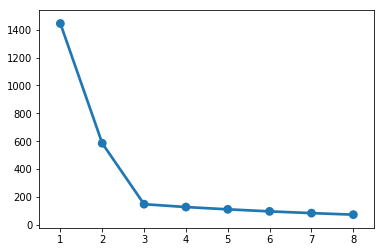

In [24]:
# List that will hold the sum of square values for different cluster sizes

ss= []

# We will compute ss for cluster sizes between 1 and 8
for i in range(1,9):
    
    # Initialize the KMeans object and call the fit method to compute clusters
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=10, init='random').fit(X)
    
    # Append the value of ss for a particular iteration into the ss list
    ss.append(kmeans.inertia_)
    
    
# Plot the Elbow Plot of SS v/s K
sns.pointplot(x=[j for j in range(1, 9)], y=ss)

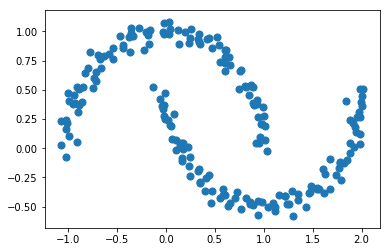

In [25]:
# Import the half-moon function from scikit-learn
from sklearn.datasets import make_moons

# Get access to points using the make-moons function
X_m, y_m = make_moons(200, noise=.05, random_state=0)

# Plot the two half moon clusters
plt.scatter(X_m[:, 0], X_m[:, 1], s=50)

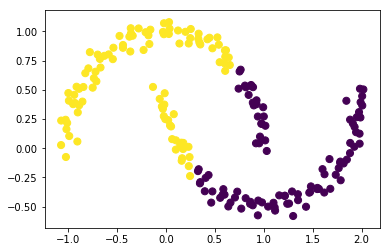

In [35]:
# Initialize K-Means with K=2 (for two half-moons) and fit it to our data
kmm = KMeans(n_clusters=2, init='random', max_iter=10)
kmm.fit(X_m)

# Predict the classes for the data points
y_m_pred = kmm.predict(X_m)

# Plot the colored clusters as identified by K-Means
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_pred, s=50)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


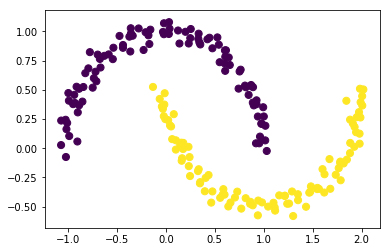

In [26]:
# Import Spectral Clustering from Scikit-Learn 
from sklearn.cluster import SpectralClustering

# Define the Spectral Clustering Model
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')

# Fit and predict the labels
y_m_sc = model.fit_predict(X_m)

# Plot the colored clusters as identified by Spectral Clustering
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_sc, s=50)


### Dimensionality Reduction

#### Principal Component Analysis

In [27]:
# Load teh Iris data set into Pandas Data Frame
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=['sepal_length','sepal_width','petal_length','petal_width','class'])

# Display the head of the data frame
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
# Import Standard Scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Separate the features and class 
X = iris.drop('class', axis=1)
y = iris['class']

In [29]:
# Scale the features of X
X = pd.DataFrame(StandardScaler().fit_transform(X), columns= ['sepal_length','sepal_width','petal_length','petal_width'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [30]:
# Import PCA 
from sklearn.decomposition import PCA

# Initialize the PCA object to transform into the 2D space.
pca = PCA(n_components = 2)

# Apply PCA
pca_iris = pca.fit_transform(X)
pca_iris = pd.DataFrame(data=pca_iris, columns = ['PC1', 'PC2'])

pca_iris.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [31]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [32]:
# Concatenate the class variable
pca_iris = pd.concat([pca_iris, y], axis=1)

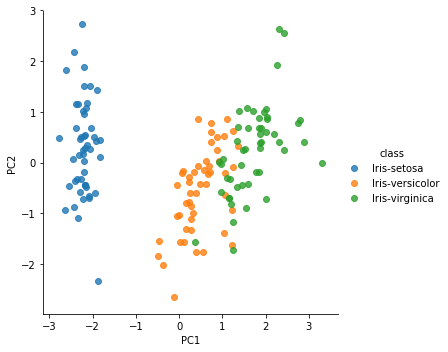

In [33]:
# Display the scatter plot
sns.lmplot(x='PC1', y='PC2', data=pca_iris, hue='class', fit_reg=False)

#### Linear Discriminant Analysis

In [34]:
# Import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [35]:
# Define the LDA object to have two components
lda = LinearDiscriminantAnalysis(n_components=2)

In [36]:
# Apply LDA
lda_iris = lda.fit_transform(X, y)

In [37]:
lda_iris = pd.DataFrame(data=lda_iris, columns=['C1', 'C2'])

In [38]:
# Concatenate the class variable
lda_iris = pd.concat([lda_iris, y], axis=1)

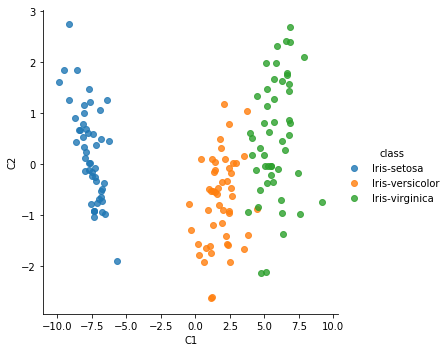

In [39]:
# Display the scatter plot
sns.lmplot(x='C1', y='C2', data=lda_iris, hue='class', fit_reg=False)

### Supervised Learning

#### Gradient Boosting

In [40]:
# Divide the dataset into the feature dataframe and the target class series
X, y = iris.drop('class', axis=1), iris['class']

In [41]:
# Split the data into the training and train datasets.
# We will train on 75% of the data and asses our peformance on 25% of thd data

# Import the splitting function
from sklearn.model_selection import train_test_split

In [42]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [43]:
# Import the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
# Apply Gradient Boosting to the training data
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [50]:
# Compute the accuracy on the test set
gbc.score(X_test, y_test)

0.9736842105263158

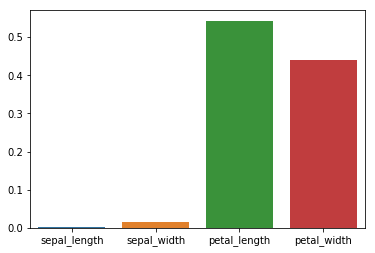

In [51]:
# Display a bar plot of feature importances
sns.barplot(x= ['sepal_length','sepal_width','petal_length','petal_width'], y=gbc.feature_importances_)